# In this notebook I plot some spectra on ROI to have a quick view on the IMAT experiment

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import os, fnmatch
from os import listdir
#%matplotlib inline
%matplotlib notebook
import scipy.signal
import matplotlib.patches as patches
# from scipy.signal import find_peaks
# print(scipy.__version__)

/home/carminati_c/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Constant values
h=6.62607004e-34 #Planck constant [m^2 kg / s]
m=1.674927471e-27 #Neutron mass [kg]
t0=0.01
L= 56.4 #[m]
dL = 0

In [3]:
def tof2l(tof):
    l=h/m*(tof-t0)/(L+dL)/1e-10
    return l

def l2tof(l):
    tof=t0+(l*1e-10)*(L+dL)*m/h
    return tof

In [78]:
pathdata= "/data/data2/IMAT_Nov2018/Sample_10090deg_Corrected/"
pathdata_180= "/data/data2/IMAT_Nov2018/Sample_10180deg_Corrected/"
pathOB= "/data/data2/IMAT_Nov2018/Flat1_Corrected/"
myTOF = np.genfromtxt('/data/data2/IMAT_Nov2018/Flat1_Corrected/IMAT00010433_VerticalSetting_2hruns_000_Spectra.txt', usecols=0)

In [79]:
#load the dataset

myfiles = fnmatch.filter(listdir(pathdata),'*.fits')
coll_files = sorted(myfiles)

myfiles_180 = fnmatch.filter(listdir(pathdata_180),'*.fits')
coll_files_180 = sorted(myfiles_180)

obfiles = fnmatch.filter(listdir(pathOB),'*.fits') # here there are several OB folders
coll_ob = sorted(obfiles)


In [6]:
coll_files[0:10]

['Sample_10090deg_Corrected_00000.fits',
 'Sample_10090deg_Corrected_00001.fits',
 'Sample_10090deg_Corrected_00002.fits',
 'Sample_10090deg_Corrected_00003.fits',
 'Sample_10090deg_Corrected_00004.fits',
 'Sample_10090deg_Corrected_00005.fits',
 'Sample_10090deg_Corrected_00006.fits',
 'Sample_10090deg_Corrected_00007.fits',
 'Sample_10090deg_Corrected_00008.fits',
 'Sample_10090deg_Corrected_00009.fits']

In [62]:
roi_ref1=np.array([400,402,450,420])
roi_ref2=np.array([400,308,450,325])
roi_stress1=np.array([150,402,200,420])
roi_stress2=np.array([150,305,200,322])

# plt.imshow(myim[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]])
spectrum_ref1=np.zeros(len(coll_files))
spectrum_ref2=np.zeros(len(coll_files))
spectrum_stress1=np.zeros(len(coll_files))
spectrum_stress2=np.zeros(len(coll_files))
spectrum_ob_ref1=np.zeros(len(coll_files))
spectrum_ob_ref2=np.zeros(len(coll_files))
spectrum_ob_stress1=np.zeros(len(coll_files))
spectrum_ob_stress2=np.zeros(len(coll_files))

for i in range(0, len(coll_files)):
    im_ref1=(fits.open(pathdata+coll_files[i])[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)
    im_ref2=(fits.open(pathdata+coll_files[i])[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)
    im_stress1=(fits.open(pathdata+coll_files[i])[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)
    im_stress2=(fits.open(pathdata+coll_files[i])[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)
    
    ob_ref1=(fits.open(pathOB+coll_ob[i])[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)
    ob_ref2=(fits.open(pathOB+coll_ob[i])[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)
    ob_stress1=(fits.open(pathOB+coll_ob[i])[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)
    ob_stress2=(fits.open(pathOB+coll_ob[i])[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)
    
    spectrum_ref1[i]=np.sum(im_ref1[~np.isnan(im_ref1) & ~np.isinf(im_ref1)])
    spectrum_ref2[i]=np.sum(im_ref2[~np.isnan(im_ref2) & ~np.isinf(im_ref2)])
    spectrum_stress1[i]=np.sum(im_stress1[~np.isnan(im_stress1) & ~np.isinf(im_stress1)])
    spectrum_stress2[i]=np.sum(im_stress2[~np.isnan(im_stress2) & ~np.isinf(im_stress2)])
    spectrum_ob_ref1[i]=np.sum(ob_ref1[~np.isnan(ob_ref1) & ~np.isinf(ob_ref1)])
    spectrum_ob_ref2[i]=np.sum(ob_ref2[~np.isnan(ob_ref2) & ~np.isinf(ob_ref2)])
    spectrum_ob_stress1[i]=np.sum(ob_stress1[~np.isnan(ob_stress1) & ~np.isinf(ob_stress1)])
    spectrum_ob_stress2[i]=np.sum(ob_stress2[~np.isnan(ob_stress2) & ~np.isinf(ob_stress2)])

In [106]:
#the roi for the two orientations are slightly different because I want them now centered
roi_ref1_180=np.array([400,305,450,322])
roi_ref2_180=np.array([430,428,480,440])
roi_stress1_180=np.array([150,410,200,430])
roi_stress2_180=np.array([150,320,200,340])

spectrum_ref1_180=np.zeros(len(coll_files_180))
spectrum_ref2_180=np.zeros(len(coll_files_180))
spectrum_stress1_180=np.zeros(len(coll_files_180))
spectrum_stress2_180=np.zeros(len(coll_files_180))

for i in range(0, len(coll_files_180)):
    im_ref1_180=(fits.open(pathdata_180+coll_files_180[i])[0].data[roi_ref1_180[1]:roi_ref1_180[3],roi_ref1_180[0]:roi_ref1_180[2]]).astype(float)
    im_ref2_180=(fits.open(pathdata_180+coll_files_180[i])[0].data[roi_ref2_180[1]:roi_ref2_180[3],roi_ref2_180[0]:roi_ref2_180[2]]).astype(float)
    im_stress1_180=(fits.open(pathdata_180+coll_files_180[i])[0].data[roi_stress1_180[1]:roi_stress1_180[3],roi_stress1_180[0]:roi_stress1_180[2]]).astype(float)
    im_stress2_180=(fits.open(pathdata_180+coll_files_180[i])[0].data[roi_stress2_180[1]:roi_stress2_180[3],roi_stress2_180[0]:roi_stress2_180[2]]).astype(float)
    
    spectrum_ref1_180[i]=np.sum(im_ref1_180[~np.isnan(im_ref1_180) & ~np.isinf(im_ref1_180)])
    spectrum_ref2_180[i]=np.sum(im_ref2_180[~np.isnan(im_ref2_180) & ~np.isinf(im_ref2_180)])
    spectrum_stress1_180[i]=np.sum(im_stress1_180[~np.isnan(im_stress1_180) & ~np.isinf(im_stress1_180)])
    spectrum_stress2_180[i]=np.sum(im_stress2_180[~np.isnan(im_stress2_180) & ~np.isinf(im_stress2_180)])

<IPython.core.display.Javascript object>


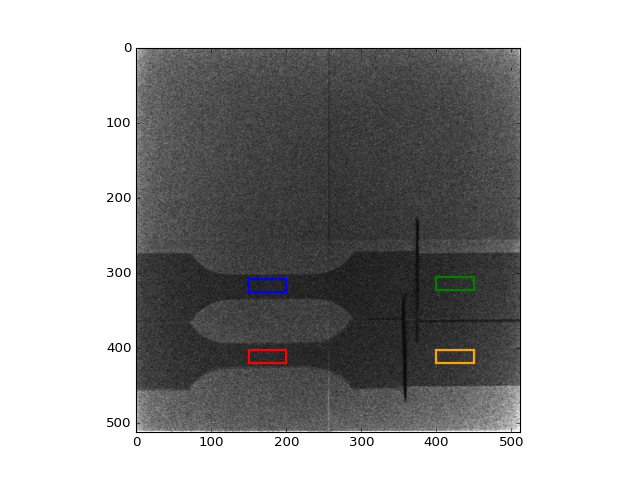

In [63]:
fig,ax =plt.subplots()
myim=fits.open(pathdata+coll_files[1500])[0].data.astype(float)
ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
roi1= patches.Polygon([(150,402),(200,402),(200,420),(150,420)], edgecolor='red', facecolor='none',  linewidth=2)
ax.add_patch(roi1)
roi2= patches.Polygon([(150,308),(200,308),(200,325),(150,325)], edgecolor='blue', facecolor='none',  linewidth=2)
ax.add_patch(roi2)

roi3= patches.Polygon([(450,402),(400,402),(400,420),(450,420)], edgecolor='orange', facecolor='none',  linewidth=2)
ax.add_patch(roi3)
roi4= patches.Polygon([(450,305),(400,305),(400,322),(450,322)], edgecolor='green', facecolor='none',  linewidth=2)
ax.add_patch(roi4)


<IPython.core.display.Javascript object>


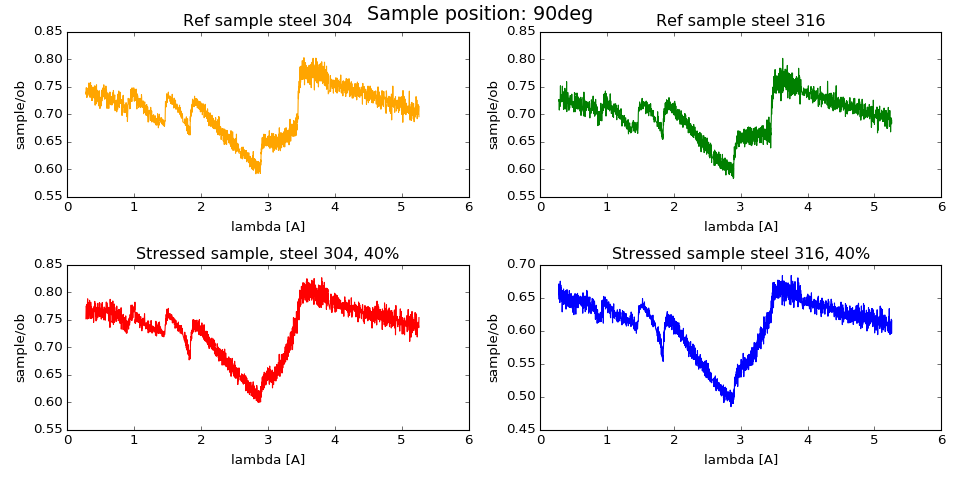

In [92]:
ref1_spectrum_norm=(spectrum_ref1/spectrum_ob_ref1)
ref2_spectrum_norm=(spectrum_ref2/spectrum_ob_ref2)
stress1_spectrum_norm=(spectrum_stress1/spectrum_ob_stress1)
stress2_spectrum_norm=(spectrum_stress2/spectrum_ob_stress1) #something is wierd with the spetrum_ob_stress2
mylambda=tof2l(myTOF)

fig, axarr = plt.subplots(2,2, figsize=(12,6))
axarr[0,0].plot(mylambda, ref1_spectrum_norm, color='orange')
axarr[0,0].set_title('Ref sample steel 304')
axarr[0,0].set_ylabel('sample/ob')
axarr[0,0].set_xlabel('lambda [A]')

axarr[1,0].plot(mylambda, stress1_spectrum_norm, color='red')
axarr[1,0].set_title('Stressed sample, steel 304, 40%')
axarr[1,0].set_ylabel('sample/ob')
axarr[1,0].set_xlabel('lambda [A]')

axarr[0,1].plot(mylambda, ref2_spectrum_norm, color='green')
axarr[0,1].set_title('Ref sample steel 316')
axarr[0,1].set_ylabel('sample/ob')
axarr[0,1].set_xlabel('lambda [A]')

axarr[1,1].plot(mylambda, stress2_spectrum_norm, color='blue')
axarr[1,1].set_title('Stressed sample steel 316, 40%')
axarr[1,1].set_ylabel('sample/ob')
axarr[1,1].set_xlabel('lambda [A]')

st = fig.suptitle("Sample position: 90deg", fontsize="x-large")
st.set_y(0.99)
fig.subplots_adjust(top=0.85)
plt.tight_layout()

# axarr[1]=plt.plot(mylambda, ref2_spectrum_norm, color='green')

<IPython.core.display.Javascript object>


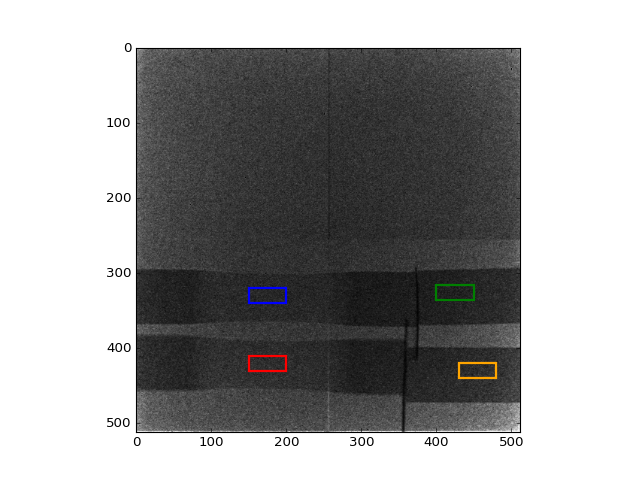

In [105]:
fig,ax =plt.subplots()
myim=fits.open(pathdata_180+coll_files_180[1500])[0].data.astype(float)
ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
roi1= patches.Polygon([(150,410),(200,410),(200,430),(150,430)], edgecolor='red', facecolor='none',  linewidth=2)
ax.add_patch(roi1)
roi2= patches.Polygon([(150,320),(200,320),(200,340),(150,340)], edgecolor='blue', facecolor='none',  linewidth=2)
ax.add_patch(roi2)

roi3= patches.Polygon([(480,420),(430,420),(430,440),(480,440)], edgecolor='orange', facecolor='none',  linewidth=2)
ax.add_patch(roi3)
roi4= patches.Polygon([(450,315),(400,315),(400,335),(450,335)], edgecolor='green', facecolor='none',  linewidth=2)
ax.add_patch(roi4)



<IPython.core.display.Javascript object>


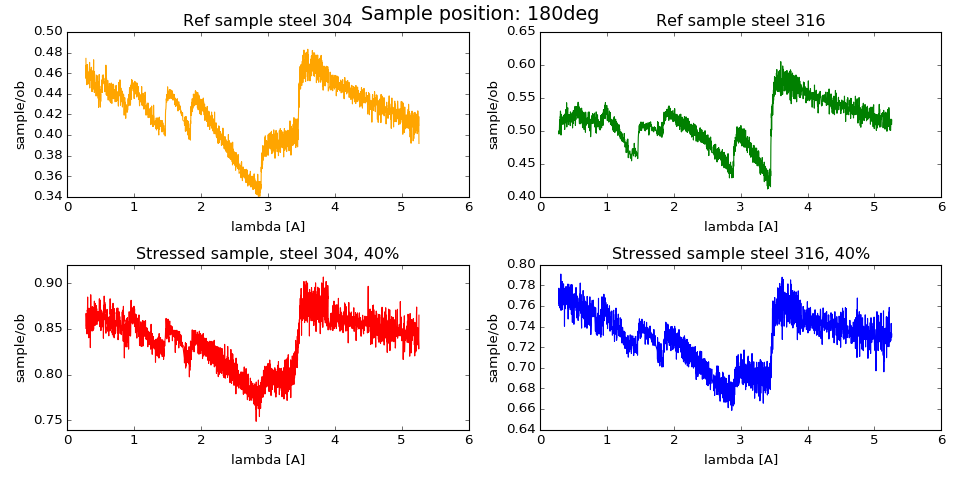

In [109]:
ref1_spectrum_norm_180=(spectrum_ref1_180/spectrum_ob_ref1)
ref2_spectrum_norm_180=(spectrum_ref2_180/spectrum_ob_ref2)
stress1_spectrum_norm_180=(spectrum_stress1_180/spectrum_ob_stress1)
stress2_spectrum_norm_180=(spectrum_stress2_180/spectrum_ob_stress1) #something is wierd with the spetrum_ob_stress2
mylambda=tof2l(myTOF)

fig, axarr = plt.subplots(2,2, figsize=(12,6))
axarr[0,0].plot(mylambda, ref1_spectrum_norm_180, color='orange')
axarr[0,0].set_title('Ref sample steel 304')
axarr[0,0].set_ylabel('sample/ob')
axarr[0,0].set_xlabel('lambda [A]')

axarr[1,0].plot(mylambda, stress1_spectrum_norm_180, color='red')
axarr[1,0].set_title('Stressed sample, steel 304, 40%')
axarr[1,0].set_ylabel('sample/ob')
axarr[1,0].set_xlabel('lambda [A]')

axarr[0,1].plot(mylambda, ref2_spectrum_norm_180, color='green')
axarr[0,1].set_title('Ref sample steel 316')
axarr[0,1].set_ylabel('sample/ob')
axarr[0,1].set_xlabel('lambda [A]')

axarr[1,1].plot(mylambda, stress2_spectrum_norm_180, color='blue')
axarr[1,1].set_title('Stressed sample steel 316, 40%')
axarr[1,1].set_ylabel('sample/ob')
axarr[1,1].set_xlabel('lambda [A]')

st = fig.suptitle("Sample position: 180deg", fontsize="x-large")
st.set_y(0.99)
fig.subplots_adjust(top=0.85)
plt.tight_layout()

plt.tight_layout()